1. 데이터 가공

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/myComment_B/Test_0824_0829.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
comments_list = []
for i in range(len(df)):
    comments_list.append(df['댓글내용'][i])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import time
import datetime
start = time.time()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
 %pip install konlpy

# from konlpy.tag import Kkma
# kkma = Kkma()

from konlpy.tag import Okt
okt = Okt()

# from konlpy.tag import Mecab
# mecab = Mecab()


from tqdm import tqdm
from pandas import DataFrame
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from string import punctuation

def strip_punctuation(s):
    return ''.join(c for c in s if c not in punctuation)

clean_comments = []
for sent in comments_list:
    clean = strip_punctuation(sent)
    clean_comments.append(clean)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dataset = []

for i in tqdm(range(len(df))):
    dataset.append(okt.nouns(clean_comments[i]))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 4442/4442 [00:36<00:00, 121.41it/s]


In [ ]:
# %pip install gensim

from gensim import corpora, models
import gensim

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
high_score = dataset

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
stops = ['꽤', '더', '것', '그', '이', '좀', '왜', '뭐', '거', '수',
         '저', '알', '방', '때', '걸', '내', '건', '못', '게', '놈',
         '사', '손', '니', '요', '군', '또', '듯', '나', '개', '씨',
         '분', '애', '안']

high_score = [[y for y in x if y not in (stops)]
              for x in high_score]
#high_score = [[y for y in x if not len(y) == 0]
#              for x in high_score]
dictionary = corpora.Dictionary(high_score)
corpus = [dictionary.doc2bow(text) for text in high_score]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2. LDA 토픽모델링

In [ ]:
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel

coherence_values = []
for i in tqdm(range(2, 15)):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=high_score, dictionary = dictionary, topn = 10)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 13/13 [00:37<00:00,  2.92s/it]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


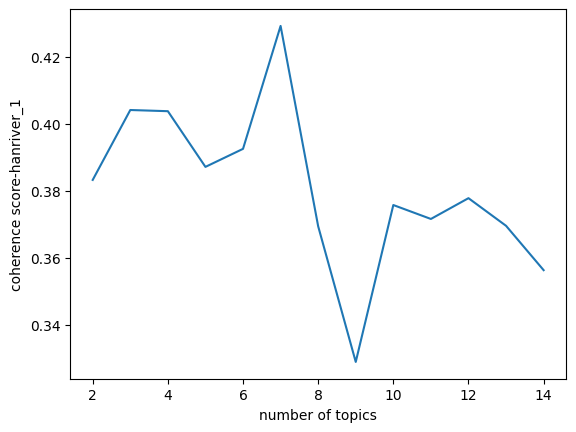

In [ ]:
# CoherenceModel을 통한 토픽 최적화
# 의미: 토픽이 얼마나 의미론적으로 일관성 있는지 판단.
# 높을수록 의미론적 일관성 높음

x = range(2, 15)
plt.plot(x, coherence_values)
plt.xlabel("number of topics")
plt.ylabel("coherence score-hanriver_1")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
perplexity_values = []
for i in tqdm(range(2, 20)):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    perplexity_values.append(ldamodel.log_perplexity(corpus))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 18/18 [00:47<00:00,  2.63s/it]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


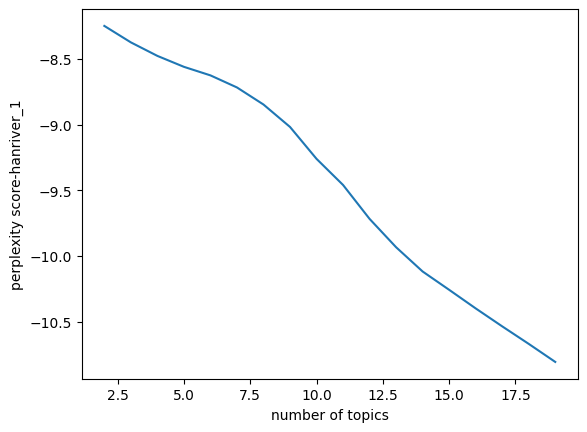

In [ ]:
# Perplexity:PPL로 줄여서 표현
# 선정된 토픽 개수마다 학습시켜 가장 낮은 값을 보이는 구간을 찾아 최적화된 토픽의 개수 선정가능
# 의미: 확률 모델이 결과를 얼마나 정확하게 예측하는지 판단. 낮을수록 정확하게 예측
# 주 용도: 동일 모델 내 파라미터에 따른 성능 평가할 때 주로 사용
# 한계: Perplexity가 낮다고 해서, 결과가 해석 용이하다는 의미가 아님
x=range(2, 20)
plt.plot(x, perplexity_values)
plt.xlabel("number of topics")
plt.ylabel("perplexity score-hanriver_1")
plt.show()

In [ ]:
# Coherence와 Perplexity에 따라서 토픽 개수 지정
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=12, alpha=0.1, id2word=dictionary)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
ldamodel.print_topics(num_words=10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.043*"사형" + 0.022*"집행" + 0.016*"인권" + 0.013*"답" + 0.013*"영화" + 0.012*"경찰" + 0.011*"생각" + 0.010*"상대방" + 0.009*"사람" + 0.009*"가석방"'),
 (1,
  '0.033*"인권" + 0.022*"증거" + 0.018*"범죄자" + 0.013*"원주" + 0.013*"피해자" + 0.013*"사람" + 0.012*"반대" + 0.011*"국민" + 0.011*"처벌" + 0.010*"지명"'),
 (2,
  '0.043*"흉기" + 0.037*"법" + 0.018*"처벌" + 0.017*"테이저건" + 0.017*"난동" + 0.016*"현장" + 0.015*"경찰" + 0.013*"벌금" + 0.011*"인간" + 0.010*"이하"'),
 (3,
  '0.022*"해" + 0.018*"낭비" + 0.016*"경찰" + 0.012*"청구" + 0.012*"칼" + 0.010*"산" + 0.010*"나라" + 0.010*"출동" + 0.010*"국민" + 0.010*"국가"'),
 (4,
  '0.033*"총" + 0.016*"경찰" + 0.015*"구속" + 0.015*"칼" + 0.012*"엄벌" + 0.012*"조사" + 0.012*"민주당" + 0.012*"대해" + 0.012*"사살" + 0.011*"함"'),
 (5,
  '0.024*"한동훈" + 0.014*"칼부림" + 0.013*"족" + 0.012*"장난" + 0.012*"예산" + 0.011*"정신" + 0.011*"뉴스" + 0.011*"범죄" + 0.011*"점" + 0.009*"흉기"'),
 (6,
  '0.025*"영화" + 0.021*"한동훈" + 0.016*"장관" + 0.014*"사람" + 0.012*"살인" + 0.011*"원주시" + 0.009*"제목" + 0.008*"역시" + 0.008*"곳" + 0.008*"그냥"'),
 (7,
  '0.034*"치악산" + 0.025

In [ ]:
 %pip install pyLDAvis==3.4.0
import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)
pyLDAvis.save_html(vis, './comment_topic_Visualization.html')
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/pyLDAvis/_prepare.py:244: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
11    -0.025925 -0.014312       1        1  11.706242
6     -0.105443 -0.034352       2        1  10.163346
7     -0.152687 -0.009331       3        1  10.063880
1      0.022160  0.125675       4        1   9.669341
0      0.006305  0.028596       5        1   9.369617
9      0.103965  0.092250       6        1   7.886367
3      0.057140 -0.064857       7        1   7.433589
5     -0.013068  0.016334       8        1   7.354391
8     -0.041426 -0.072902       9        1   7.259362
10    -0.066719  0.063473      10        1   6.758982
2      0.113813  0.038880      11        1   6.585698
4      0.101886 -0.169454      12        1   5.749184, topic_info=     Term        Freq       Total Category  logprob  loglift
3061  치악산  167.000000  167.000000  Default  30.0000  30.0000
2558  한동훈  144.000000  144.000000  Default  29.0000  29.0000
205    흉기  204.000000  204.000000  Default  28.0000  28.0000
803    영화  356.000000  356.000000  Default  27.0000  27.0000
1165    총  119.000000  119.000000  Default  26.0000  26.0000
...   ...         ...         ...      ...      ...      ...
155    범죄   17.306059  295.555339  Topic12  -4.8267   0.0183
3045   곡성   12.542189   88.221779  Topic12  -5.1487   0.9054
253   범죄자   13.385083  216.967490  Topic12  -5.0836   0.0705
715    생각   12.966582  227.254152  Topic12  -5.1154  -0.0076
2248   법안   11.482856   39.807512  Topic12  -5.2369   1.6129

[768 rows x 6 columns], token_table=      Topic      Freq Term
term                      
67        6  0.819178   가득
4113      9  0.885560   가라
1167      1  0.033627  가석방
1167      5  0.347474  가석방
1167      6  0.459563  가석방
...     ...       ...  ...
582      11  0.109857   흉악
582      12  0.007324   흉악
873       1  0.340371    힘
873       4  0.085093    힘
873       8  0.553104    힘

[1928 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[12, 7, 8, 2, 1, 10, 4, 6, 9, 11, 3, 5])

In [ ]:
topics = ldamodel.print_topics(num_words=10)
topic_values = []
for i in topics:
  topic_value = i[1]
  topic_value
  topic_values.append(topic_value)
topic_prop = pd.DataFrame({"topic": topic_values})
topic_prop.to_csv("./comment_topic.csv", encoding="utf-8-sig")
topic_prop

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,topic
0,"0.043*""사형"" + 0.022*""집행"" + 0.016*""인권"" + 0.013*""..."
1,"0.033*""인권"" + 0.022*""증거"" + 0.018*""범죄자"" + 0.013*..."
2,"0.043*""흉기"" + 0.037*""법"" + 0.018*""처벌"" + 0.017*""테..."
3,"0.022*""해"" + 0.018*""낭비"" + 0.016*""경찰"" + 0.012*""청..."
4,"0.033*""총"" + 0.016*""경찰"" + 0.015*""구속"" + 0.015*""칼..."
5,"0.024*""한동훈"" + 0.014*""칼부림"" + 0.013*""족"" + 0.012*..."
6,"0.025*""영화"" + 0.021*""한동훈"" + 0.016*""장관"" + 0.014*..."
7,"0.034*""치악산"" + 0.025*""영화"" + 0.013*""손해배상"" + 0.01..."
8,"0.021*""그냥"" + 0.017*""글"" + 0.014*""인생"" + 0.014*""가..."
9,"0.026*""조선족"" + 0.021*""사회"" + 0.014*""실탄"" + 0.014*..."


In [ ]:
kk = ldamodel.show_topic(0, topn=80000)
type(ldamodel.show_topic)
kk2=pd.DataFrame(kk)
kk2.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1
0,사형,0.042528
1,집행,0.022033
2,인권,0.016324
3,답,0.013109
4,영화,0.012530
5,경찰,0.011539
6,생각,0.010923
7,상대방,0.010219
8,사람,0.009229
9,가석방,0.008929


In [ ]:
kk2.to_csv("./topic_keyword.csv", encoding="utf-8-sig")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


3. 소셜 네트워크

In [ ]:
import matplotlib.pyplot as plt

count = {}
for tokens in high_score:
  stopped_tokens = [i for i in list(set(tokens))]
  for i,a in enumerate(stopped_tokens):
    for b in stopped_tokens[i+1:]:
      if a>b:
        count[b,a] = count.get((b,a),0)+1
      else:
        count[a,b] = count.get((a,b),0)+1
df = pd.DataFrame.from_dict(count, orient='index')

list1 = []
for i in range(len(df)):
  list1.append([df.index[i][0], df.index[i][1], df[0][i]])

df2 = pd.DataFrame(list1, columns=["term1", "term2", "freq"])
df2 = df2.sort_values(by=['freq'], ascending=False)
df2 = df2.reset_index(drop=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#%pip install networkx

import networkx as nx
import operator

G_centrality = nx.Graph()

for ind in range(len(np.where(df2['freq']>=3)[0])):
  G_centrality.add_edge(df2['term1'][ind], df2['term2'][ind], weight=int(df2['freq'][ind]))

dgr = nx.degree_centrality(G_centrality)
sorted_dgr = sorted(dgr.items(), key=operator.itemgetter(1),reverse=True)

aa = pd.DataFrame(sorted_dgr)
aa.columns = ['keyword', 'degree']
aa.to_csv("./keyword_network.csv", encoding="utf-8-sig")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
